In [1]:
# Importing Libraries
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input


In [3]:
import os

# Define the path to your dataset
dataset_path = 'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\dataset_blood_group'

# Verify the directory exists
if os.path.exists(dataset_path):
    # List contents of the dataset directory
    print("Contents of the dataset directory:")
    print(os.listdir(dataset_path))

    # List all folders (blood group categories) in the dataset
    name_class = os.listdir(dataset_path)
    print("Blood group categories:")
    print(name_class)
else:
    print(f"The directory {dataset_path} does not exist.")


Contents of the dataset directory:
['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']
Blood group categories:
['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [5]:
from PIL import Image
import os

# Path to the dataset
file_path = 'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\dataset_blood_group'

# List all folders (blood group categories) in the dataset
name_class = os.listdir(file_path)

# Loop through each blood group folder
for folder in name_class:
    folder_path = os.path.join(file_path, folder)

    # List images in the current folder
    images = os.listdir(folder_path)
    print(f"Processing folder: {folder} - Total images: {len(images)}")

    # Example: Open and display the first image in the folder
    if images:  # Check if the folder has any images
        img_path = os.path.join(folder_path, images[0])
        img = Image.open(img_path)

        # Display image properties
        print(f"First image in {folder}: {images[0]} - Size: {img.size}, Format: {img.format}")

        # Optionally, show the image (only works in interactive environments)
        # img.show()


Processing folder: A+ - Total images: 566
First image in A+: cluster_0_1001.BMP - Size: (96, 103), Format: BMP
Processing folder: A- - Total images: 1009
First image in A-: cluster_1_0.BMP - Size: (96, 103), Format: BMP
Processing folder: AB+ - Total images: 708
First image in AB+: cluster_4_100.BMP - Size: (96, 103), Format: BMP
Processing folder: AB- - Total images: 761
First image in AB-: cluster_5_1003.BMP - Size: (96, 103), Format: BMP
Processing folder: B+ - Total images: 652
First image in B+: cluster_2_10.BMP - Size: (96, 103), Format: BMP
Processing folder: B- - Total images: 741
First image in B-: cluster_3_1017.BMP - Size: (96, 103), Format: BMP
Processing folder: O+ - Total images: 852
First image in O+: cluster_6_1004.BMP - Size: (96, 103), Format: BMP
Processing folder: O- - Total images: 712
First image in O-: cluster_7_1002.BMP - Size: (241, 298), Format: BMP


In [6]:
import os
import glob

# Path to the dataset
file_path = 'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\dataset_blood_group'

# Use glob to list all file paths recursively
filepaths = list(glob.glob(file_path + '/**/*.*', recursive=True))

# Print the file paths
print("File paths in the dataset:")
for path in filepaths:
    print(path)


File paths in the dataset:
C:\Users\shaik\OneDrive\Desktop\Blood_group_detection\dataset_blood_group\A+\cluster_0_1001.BMP
C:\Users\shaik\OneDrive\Desktop\Blood_group_detection\dataset_blood_group\A+\cluster_0_1005.BMP
C:\Users\shaik\OneDrive\Desktop\Blood_group_detection\dataset_blood_group\A+\cluster_0_1009.BMP
C:\Users\shaik\OneDrive\Desktop\Blood_group_detection\dataset_blood_group\A+\cluster_0_1026.BMP
C:\Users\shaik\OneDrive\Desktop\Blood_group_detection\dataset_blood_group\A+\cluster_0_1029.BMP
C:\Users\shaik\OneDrive\Desktop\Blood_group_detection\dataset_blood_group\A+\cluster_0_1036.BMP
C:\Users\shaik\OneDrive\Desktop\Blood_group_detection\dataset_blood_group\A+\cluster_0_1041.BMP
C:\Users\shaik\OneDrive\Desktop\Blood_group_detection\dataset_blood_group\A+\cluster_0_1045.BMP
C:\Users\shaik\OneDrive\Desktop\Blood_group_detection\dataset_blood_group\A+\cluster_0_1063.BMP
C:\Users\shaik\OneDrive\Desktop\Blood_group_detection\dataset_blood_group\A+\cluster_0_1075.BMP
C:\Users\shai

In [7]:
import glob
import os
import pandas as pd

# Path to the dataset
file_path = 'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\dataset_blood_group'

# Gather all file paths
filepaths = glob.glob(file_path + '/**/*.*', recursive=True)

# Print the file paths to verify
print("File paths gathered:")
print(filepaths)

# Check if filepaths list is empty
if not filepaths:
    print("No file paths were found. Please check the dataset path.")
else:
    # Generate labels from folder names
    labels = [os.path.basename(os.path.dirname(filepath)) for filepath in filepaths]

    # Create pandas Series for filepaths and labels
    filepath_series = pd.Series(filepaths, name='Filepath')
    labels_series = pd.Series(labels, name='Label')

    # Combine Series into a DataFrame
    data = pd.concat([filepath_series, labels_series], axis=1)

    # Shuffle the DataFrame and reset the index
    data = data.sample(frac=1).reset_index(drop=True)

    # Display the first 5 rows
    print("DataFrame created:")
    print(data.head())


File paths gathered:
['C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\dataset_blood_group\\A+\\cluster_0_1001.BMP', 'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\dataset_blood_group\\A+\\cluster_0_1005.BMP', 'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\dataset_blood_group\\A+\\cluster_0_1009.BMP', 'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\dataset_blood_group\\A+\\cluster_0_1026.BMP', 'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\dataset_blood_group\\A+\\cluster_0_1029.BMP', 'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\dataset_blood_group\\A+\\cluster_0_1036.BMP', 'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\dataset_blood_group\\A+\\cluster_0_1041.BMP', 'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\dataset_blood_group\\A+\\cluster_0_1045.BMP', 'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\dataset_blood_group\\A+\\cluster_0_1063.BMP', 'C:\\Users\\sha

In [8]:
# Display the first 5 rows
print(data.head())


                                            Filepath Label
0  C:\Users\shaik\OneDrive\Desktop\Blood_group_de...    B+
1  C:\Users\shaik\OneDrive\Desktop\Blood_group_de...    O-
2  C:\Users\shaik\OneDrive\Desktop\Blood_group_de...   AB-
3  C:\Users\shaik\OneDrive\Desktop\Blood_group_de...    O+
4  C:\Users\shaik\OneDrive\Desktop\Blood_group_de...    B-


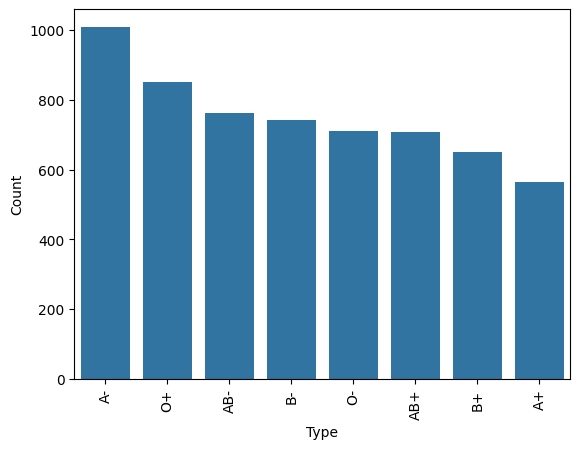

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each label
counts = data.Label.value_counts()

# Create a bar plot
sns.barplot(x=counts.index, y=counts)

# Label the axes
plt.xlabel('Type')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


C:\Users\shaik\AppData\Local\Temp\ipykernel_25896\3790054302.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='viridis')  # You can choose other palettes like 'coolwarm', 'Set2', etc.


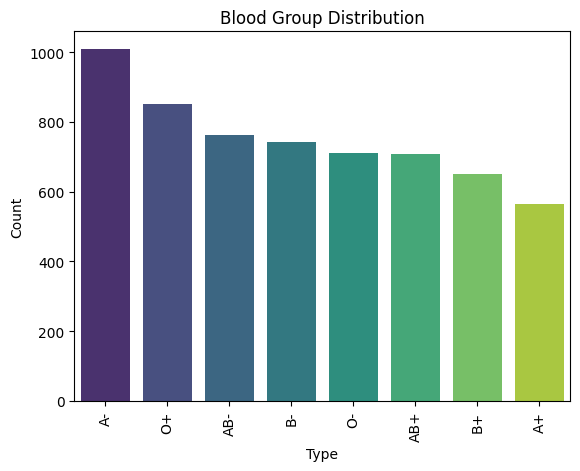

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Label' is the column you're interested in
counts = data.Label.value_counts()

# Create a bar plot with different colors
sns.barplot(x=counts.index, y=counts, palette='viridis')  # You can choose other palettes like 'coolwarm', 'Set2', etc.

plt.xlabel('Type')
plt.ylabel('Count')  # Adding a y-axis label for better clarity
plt.title('Blood Group Distribution')  # Adding a title to the plot
plt.xticks(rotation=90)
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
train, test = train_test_split(data, test_size=0.25, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

# Optional: Display the first few rows of each set
print("Training set sample:")
print(train.head())

print("Testing set sample:")
print(test.head())


Training set shape: (4500, 2)
Testing set shape: (1501, 2)
Training set sample:
                                               Filepath Label
4336  C:\Users\shaik\OneDrive\Desktop\Blood_group_de...    A-
3386  C:\Users\shaik\OneDrive\Desktop\Blood_group_de...    A+
1721  C:\Users\shaik\OneDrive\Desktop\Blood_group_de...    O+
2404  C:\Users\shaik\OneDrive\Desktop\Blood_group_de...    A-
1818  C:\Users\shaik\OneDrive\Desktop\Blood_group_de...   AB-
Testing set sample:
                                               Filepath Label
1782  C:\Users\shaik\OneDrive\Desktop\Blood_group_de...    O+
3917  C:\Users\shaik\OneDrive\Desktop\Blood_group_de...    O+
221   C:\Users\shaik\OneDrive\Desktop\Blood_group_de...   AB-
2135  C:\Users\shaik\OneDrive\Desktop\Blood_group_de...   AB+
5224  C:\Users\shaik\OneDrive\Desktop\Blood_group_de...    B-


In [12]:
import os
import shutil

# Path to your new folder for test images
test_images_path = 'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\test_images'

# Create the new folder if it doesn't exist
os.makedirs(test_images_path, exist_ok=True)

# Copy test images to the new folder
for filepath in test['Filepath']:
    # Get the base name of the file (e.g., 'cluster_0_1001.BMP')
    filename = os.path.basename(filepath)
    
    # Define the destination path
    destination_path = os.path.join(test_images_path, filename)
    
    # Copy the file
    shutil.copy(filepath, destination_path)

print(f"Test images have been copied to {test_images_path}.")


Test images have been copied to C:\Users\shaik\OneDrive\Desktop\Blood_group_detection\test_images.


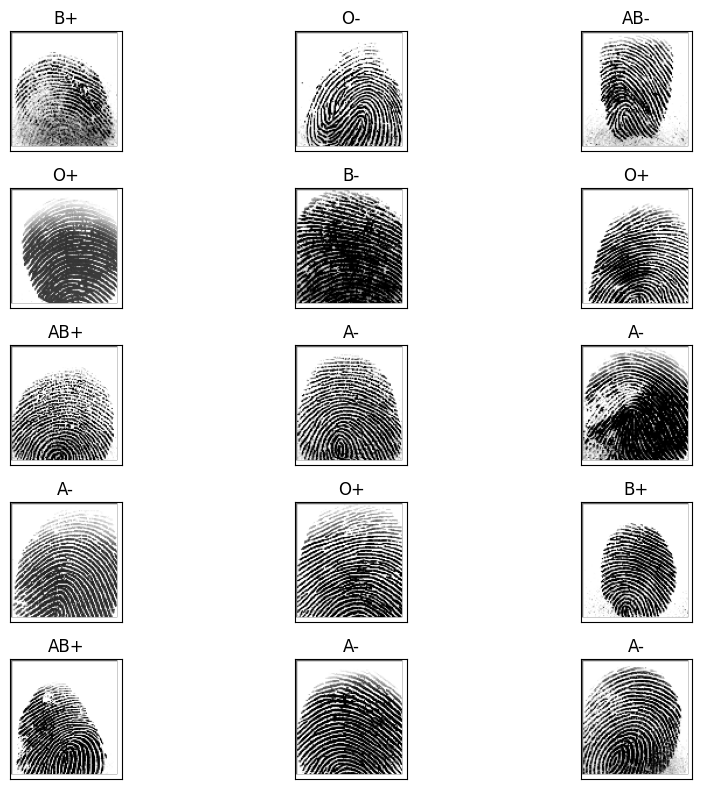

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the number of rows and columns for the grid of images
nrows, ncols = 5, 3

# Create a figure and axes for the grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})

# Loop through each axis and display an image
for i, ax in enumerate(axes.flat):
    if i < len(data):  # Check to make sure we don't exceed the number of images
        img = mpimg.imread(data.Filepath.iloc[i])  # Read the image file
        ax.imshow(img)
        ax.set_title(data.Label.iloc[i])  # Set the title of the subplot
    else:
        ax.set_visible(False)  # Hide empty subplots if there are fewer images

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [14]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=[256, 256],
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=[256, 256],
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=[256, 256],
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 4500 validated image filenames belonging to 8 classes.
Found 1501 validated image filenames belonging to 8 classes.
Found 1501 validated image filenames belonging to 8 classes.


In [16]:
import os
import shutil

# Create the directory for the test_gen images
test_gen_folder = 'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\test_gen'
os.makedirs(test_gen_folder, exist_ok=True)


In [17]:
# Loop through the test_gen and copy the images to the test_gen folder
for i in range(len(test_gen.filenames)):
    img_path = test_gen.filepaths[i]
    dest_path = os.path.join(test_gen_folder, os.path.basename(img_path))
    
    # Ensure the destination directory exists
    os.makedirs(os.path.dirname(dest_path), exist_ok=True)
    
    # Copy the image to the test_gen folder
    shutil.copy(img_path, dest_path)

print("All test images have been copied to the 'test_gen' folder.")


All test images have been copied to the 'test_gen' folder.


In [18]:
from tensorflow.keras.applications import ResNet50

# Initialize the pre-trained ResNet50 model
pretrained_model = ResNet50(
    input_shape=[256, 256, 3],
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# Freeze the layers of the pre-trained model
pretrained_model.trainable = False


In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

# Define the model
inputs = pretrained_model.input
x = Dense(128, activation='relu')(pretrained_model.output)  # First dense layer
x = Dense(128, activation='relu')(x)  # Second dense layer
outputs = Dense(8, activation='softmax')(x)  # Output layer with 8 classes and softmax activation

# Create the final model
model = Model(inputs=inputs, outputs=outputs)


In [20]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [21]:
from tensorflow.keras.callbacks import EarlyStopping

my_callbacks = [EarlyStopping(monitor='val_accuracy', min_delta=0,
                              patience=2,
                              mode='auto')]


In [73]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=3,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,  # Number of steps per epoch
    validation_steps=valid_gen.samples // valid_gen.batch_size,  # Number of steps for validation
    callbacks=my_callbacks  # Early stopping or other callbacks
)


Epoch 1/3
140/140 ━━━━━━━━━━━━━━━━━━━━ 360s 3s/step - accuracy: 0.8170 - loss: 0.4731 - val_accuracy: 0.7534 - val_loss: 0.6387
Epoch 2/3
  1/140 ━━━━━━━━━━━━━━━━━━━━ 4:31 2s/step - accuracy: 0.9062 - loss: 0.3124

c:\Users\shaik\OneDrive\Desktop\Blood_group_detection\venv\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


140/140 ━━━━━━━━━━━━━━━━━━━━ 92s 645ms/step - accuracy: 0.9062 - loss: 0.3124 - val_accuracy: 0.7602 - val_loss: 0.6326
Epoch 3/3
140/140 ━━━━━━━━━━━━━━━━━━━━ 383s 3s/step - accuracy: 0.8372 - loss: 0.4318 - val_accuracy: 0.7649 - val_loss: 0.6016


In [88]:
# Save the model in the current directory
model.save('model_blood_group_detection.keras')


In [89]:
# Save the model in the specified directory
model.save('C:/Users/shaik/fpmodel1_keras/model_blood_group_detection.keras')


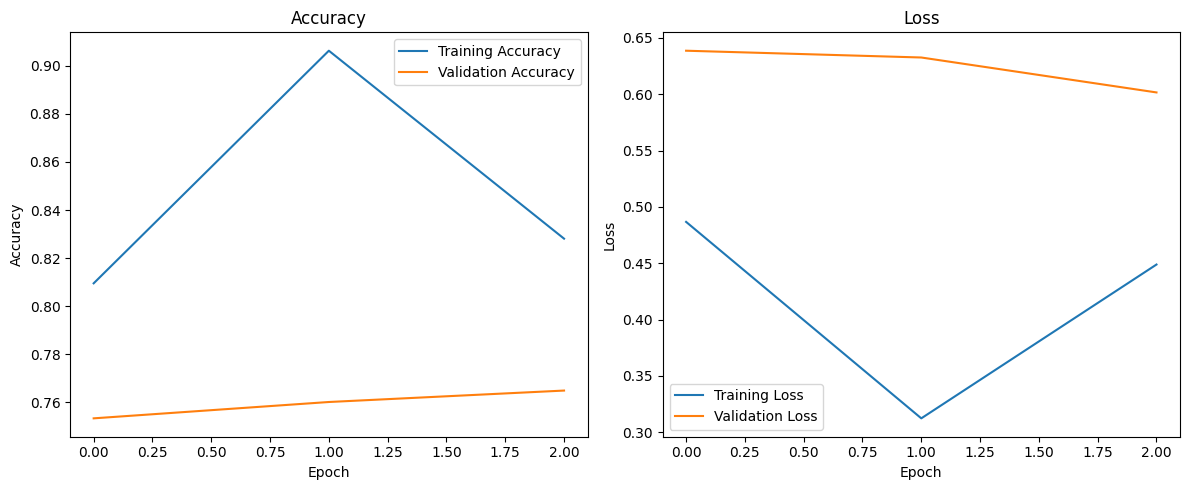

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that 'history' is defined by running model.fit first
# Example: history = model.fit(...)

# Convert history.history to DataFrame
history_df = pd.DataFrame(history.history)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
history_df[['accuracy', 'val_accuracy']].plot(ax=plt.gca())
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy", "Validation Accuracy"])

# Plot Loss
plt.subplot(1, 2, 2)
history_df[['loss', 'val_loss']].plot(ax=plt.gca())
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"])

plt.tight_layout()
plt.show()


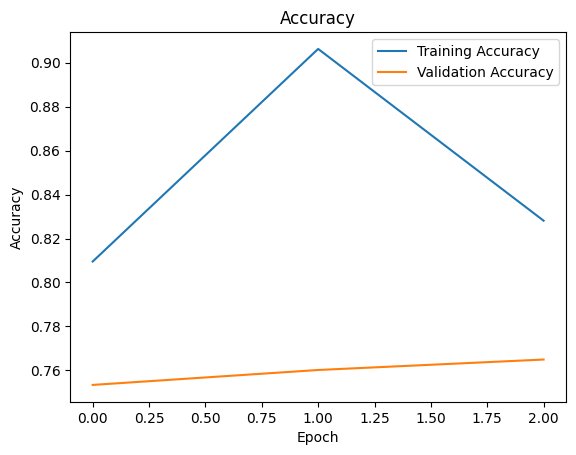

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert history.history to DataFrame
history_df = pd.DataFrame(history.history)

# Plot accuracy
history_df[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.show()


In [78]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_gen)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.7553 - loss: 0.6132
Test Loss: 0.6024
Test Accuracy: 0.7642


In [29]:
import numpy as np

# Predict the labels of the test set
pred = model.predict(test_gen)
pred_classes = np.argmax(pred, axis=1)  # Get the index of the highest probability class

# Map indices to class labels
labels = train_gen.class_indices  # Get the mapping of class labels
labels = dict((v, k) for k, v in labels.items())  # Reverse the dictionary for mapping index to label

# Convert the predicted indices to class labels
pred_labels = [labels[k] for k in pred_classes]

# Display the first 40 predictions as an example
print("First 40 Predicted Labels:")
print(pred_labels[:40])

# Optionally, display the true labels from the test set for comparison
true_labels = test_gen.classes  # True labels as indices
true_labels_mapped = [labels[k] for k in true_labels]

# Display the first 40 true labels
print("First 40 True Labels:")
print(true_labels_mapped[:40])


47/47 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step
First 40 Predicted Labels:
['O+', 'O+', 'O-', 'AB+', 'A-', 'O-', 'A-', 'O+', 'AB-', 'AB-', 'AB+', 'AB-', 'O+', 'O-', 'A-', 'A+', 'A-', 'A+', 'AB-', 'O-', 'A-', 'O+', 'AB-', 'AB-', 'B-', 'A-', 'O-', 'O-', 'O-', 'B+', 'B-', 'A+', 'B-', 'AB-', 'O+', 'O-', 'O+', 'A+', 'A+', 'O-']
First 40 True Labels:
['O+', 'O+', 'AB-', 'AB+', 'B-', 'O-', 'A-', 'A-', 'O-', 'AB-', 'AB+', 'B+', 'O+', 'O-', 'A-', 'O+', 'AB-', 'A+', 'AB-', 'O-', 'O+', 'O+', 'B+', 'A-', 'B-', 'O+', 'AB+', 'B-', 'O-', 'B+', 'B-', 'A+', 'B-', 'AB-', 'O+', 'O+', 'O+', 'A+', 'A+', 'O-']


In [79]:
from sklearn.metrics import classification_report

# Convert the predicted indices to class labels
pred_classes = np.argmax(pred, axis=1)
pred_labels = [labels[k] for k in pred_classes]  # Map indices to class names

# Assuming 'test_gen' is a valid generator and 'labels' is a dictionary mapping indices to class labels
# Get the true labels from the test generator
true_labels = test_gen.classes  # True labels as indices
true_labels_mapped = [labels[k] for k in true_labels]

# Print the classification report
print("Classification Report:")
print(classification_report(true_labels_mapped, pred_labels))


Classification Report:
              precision    recall  f1-score   support

          A+       0.76      0.86      0.80       138
          A-       0.71      0.71      0.71       235
         AB+       0.81      0.75      0.77       189
         AB-       0.54      0.85      0.66       166
          B+       0.90      0.51      0.65       179
          B-       0.94      0.80      0.86       187
          O+       0.82      0.68      0.74       214
          O-       0.69      0.83      0.75       193

    accuracy                           0.74      1501
   macro avg       0.77      0.75      0.74      1501
weighted avg       0.77      0.74      0.74      1501



In [81]:
import numpy as np

# Predict the labels of the test set
pred = model.predict(test_gen)
pred_classes = np.argmax(pred, axis=1)  # Get the index of the highest probability class

# Map indices to class labels
labels = train_gen.class_indices  # Get the mapping of class labels
labels = dict((v, k) for k, v in labels.items())  # Reverse the dictionary for mapping index to label

# Convert the predicted indices to class labels
pred_labels = [labels[k] for k in pred_classes]

# Display the first 40 predictions as an example
print("First 40 Predicted Labels:")
print(pred_labels[:40])

# Optionally, display the true labels from the test set for comparison
true_labels = test_gen.classes  # True labels as indices
true_labels_mapped = [labels[k] for k in true_labels]

# Display the first 40 true labels
print("First 40 True Labels:")
print(true_labels_mapped[:40])


47/47 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step
First 40 Predicted Labels:
['O+', 'O+', 'A-', 'AB+', 'B-', 'O-', 'A-', 'O+', 'AB-', 'AB-', 'AB+', 'B+', 'O+', 'AB-', 'A-', 'A+', 'B-', 'A+', 'B+', 'O-', 'A-', 'O+', 'B+', 'A-', 'B-', 'O+', 'AB+', 'A-', 'O-', 'B+', 'B-', 'A+', 'B-', 'AB-', 'O+', 'O+', 'O+', 'A+', 'A+', 'O-']
First 40 True Labels:
['O+', 'O+', 'AB-', 'AB+', 'B-', 'O-', 'A-', 'A-', 'O-', 'AB-', 'AB+', 'B+', 'O+', 'O-', 'A-', 'O+', 'AB-', 'A+', 'AB-', 'O-', 'O+', 'O+', 'B+', 'A-', 'B-', 'O+', 'AB+', 'B-', 'O-', 'B+', 'B-', 'A+', 'B-', 'AB-', 'O+', 'O+', 'O+', 'A+', 'A+', 'O-']


47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step
First 40 Predicted Labels:
['O+', 'O+', 'A-', 'AB+', 'B-', 'O-', 'A-', 'O+', 'AB-', 'AB-', 'AB+', 'B+', 'O+', 'AB-', 'A-', 'A+', 'B-', 'A+', 'B+', 'O-', 'A-', 'O+', 'B+', 'A-', 'B-', 'O+', 'AB+', 'A-', 'O-', 'B+', 'B-', 'A+', 'B-', 'AB-', 'O+', 'O+', 'O+', 'A+', 'A+', 'O-']
First 40 True Labels:
['O+', 'O+', 'AB-', 'AB+', 'B-', 'O-', 'A-', 'A-', 'O-', 'AB-', 'AB+', 'B+', 'O+', 'O-', 'A-', 'O+', 'AB-', 'A+', 'AB-', 'O-', 'O+', 'O+', 'B+', 'A-', 'B-', 'O+', 'AB+', 'B-', 'O-', 'B+', 'B-', 'A+', 'B-', 'AB-', 'O+', 'O+', 'O+', 'A+', 'A+', 'O-']


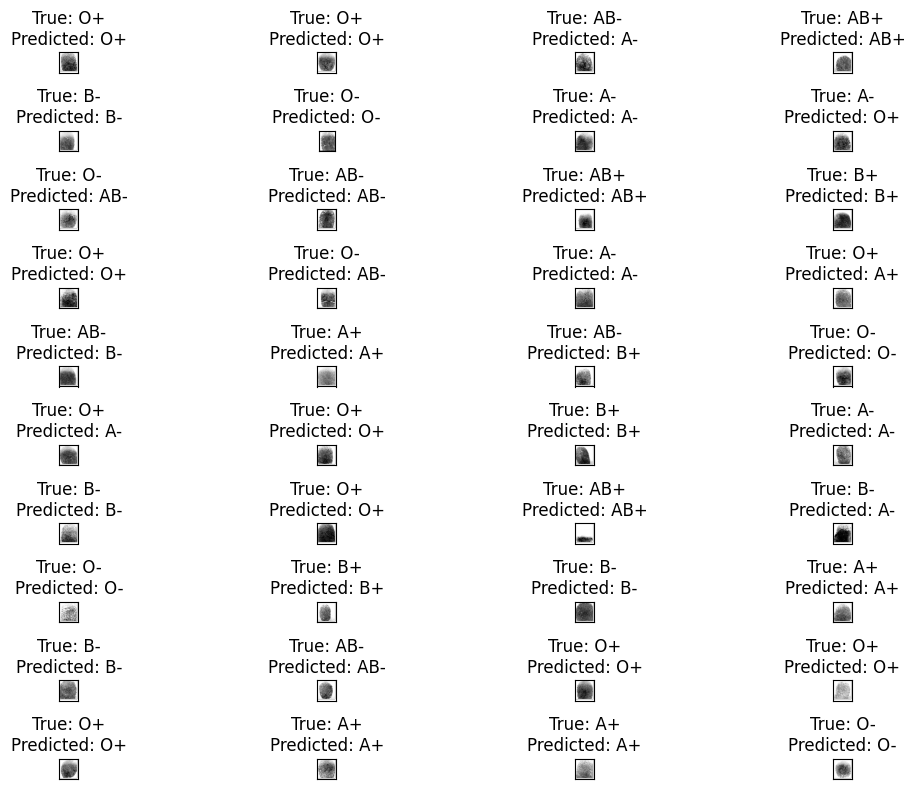

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Predict the labels of the test set
pred = model.predict(test_gen)
pred_classes = np.argmax(pred, axis=1)  # Get the index of the highest probability class

# Map indices to class labels
labels = train_gen.class_indices  # Get the mapping of class labels
labels = dict((v, k) for k, v in labels.items())  # Reverse the dictionary for mapping index to label

# Convert the predicted indices to class labels
pred_labels = [labels[k] for k in pred_classes]

# Display the first 40 predictions as an example
print("First 40 Predicted Labels:")
print(pred_labels[:40])

# Optionally, display the true labels from the test set for comparison
true_labels = test_gen.classes  # True labels as indices
true_labels_mapped = [labels[k] for k in true_labels]

# Display the first 40 true labels
print("First 40 True Labels:")
print(true_labels_mapped[:40])

# Visualize the images along with their true and predicted labels
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Display the image from the test set
    ax.imshow(plt.imread(test.Filepath.iloc[i]))  # Reads and displays image

    # Use the same predictions as displayed above
    predicted_label = pred_labels[i]  # Take the predicted label for the i-th image

    # Set the title to display both actual and predicted labels
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()


47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step


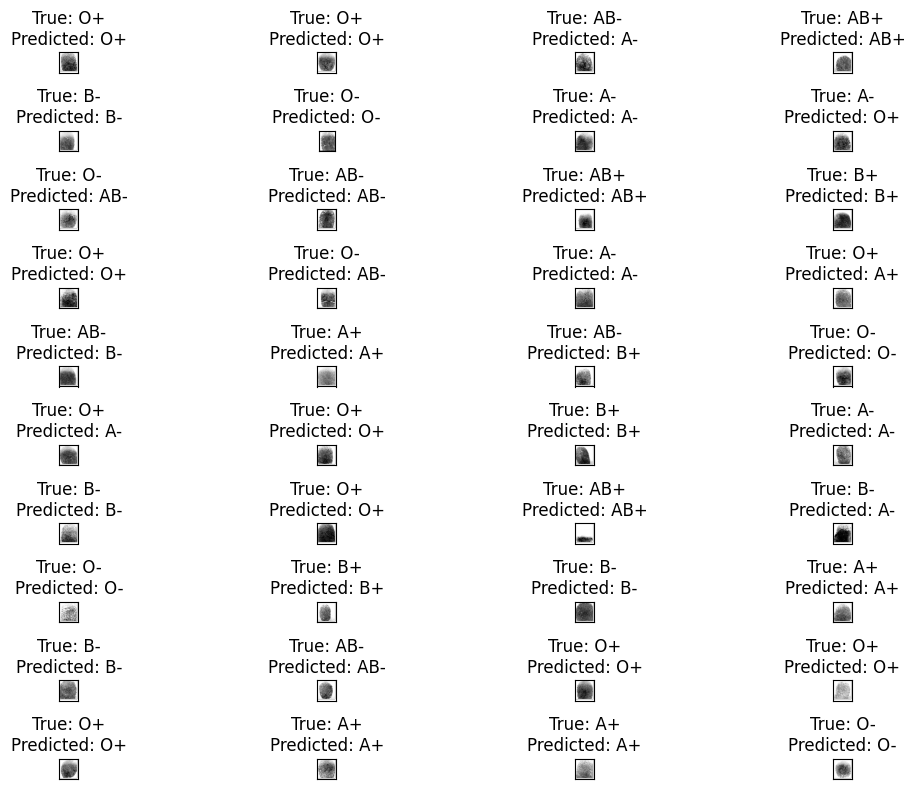

In [190]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt

# Create a new directory named test2
output_dir = r'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\test1'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Predict the labels of the test set
pred = model.predict(test_gen)
pred_classes = np.argmax(pred, axis=1)  # Get the index of the highest probability class

# Map indices to class labels
labels = train_gen.class_indices  # Get the mapping of class labels
labels = dict((v, k) for k, v in labels.items())  # Reverse the dictionary for mapping index to label

# Convert the predicted indices to class labels
pred_labels = [labels[k] for k in pred_classes]

# Optionally, display the true labels from the test set for comparison
true_labels = test_gen.classes  # True labels as indices
true_labels_mapped = [labels[k] for k in true_labels]

# Visualize the images along with their true and predicted labels
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Display the image from the test set
    img_path = test.Filepath.iloc[i]
    ax.imshow(plt.imread(img_path))  # Reads and displays image

    # Use the same predictions as displayed above
    predicted_label = pred_labels[i]  # Take the predicted label for the i-th image

    # Set the title to display both actual and predicted labels
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {predicted_label}")

    # Check if the prediction is correct and copy the image to the test2 folder if correct
    if test.Label.iloc[i] == predicted_label:
        img_filename = os.path.basename(img_path)
        new_filepath = os.path.join(output_dir, img_filename)
        shutil.copy(img_path, new_filepath)

plt.tight_layout()
plt.show()


In [85]:
# Assuming test_gen and train_gen are already defined
# Predict the labels of the test set
pred = model.predict(test_gen)
pred_classes = np.argmax(pred, axis=1)  # Get the index of the highest probability class

# Map indices to class labels
labels = train_gen.class_indices  # Get the mapping of class labels
labels = dict((v, k) for k, v in labels.items())  # Reverse the dictionary for mapping index to label

# Convert the predicted indices to class labels
pred_labels = [labels[k] for k in pred_classes]

# Optionally, display the true labels from the test set for comparison
true_labels = test_gen.classes  # True labels as indices
true_labels_mapped = [labels[k] for k in true_labels]


47/47 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step


In [86]:
# Copy all correctly predicted images to the test2 folder
for i in range(len(pred_labels)):
    img_path = test.Filepath.iloc[i]
    predicted_label = pred_labels[i]
    
    # Check if the prediction is correct
    if test.Label.iloc[i] == predicted_label:
        img_filename = os.path.basename(img_path)
        new_filepath = os.path.join(output_dir, img_filename)
        shutil.copy(img_path, new_filepath)


In [212]:
import os

# Path to the test2 folder
test2_path = r'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\test2'

# List all files in the test2 folder
files = os.listdir(test2_path)

# Count the number of files (images) in the test2 folder
num_images = len(files)

print(f"Number of images in test2 folder: {num_images}")


Number of images in test2 folder: 1147


In [9]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='keras.saving')


In [10]:
import numpy as np
from tensorflow.keras.models import load_model

In [11]:
# Load your saved model
model = load_model('model_blood_group_detection.keras')


FileUpload(value=(), accept='image/*', description='Upload')

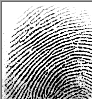

In [12]:
import io
from ipywidgets import FileUpload
from IPython.display import display
from PIL import Image

# Create the upload widget
upload = FileUpload(accept='image/*')
display(upload)

# Function to display uploaded image
def show_image(change):
    for file_tuple in upload.value:
        file_content = file_tuple['content']
        
        # Convert byte content to image
        img = Image.open(io.BytesIO(file_content))
        display(img)

# Attach event listener
upload.observe(show_image, names='value')


In [13]:
import io
from ipywidgets import FileUpload
from IPython.display import display
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model


In [14]:
# Create the upload widget
upload = FileUpload(accept='image/*', multiple=False)
display(upload)

# Function to handle the uploaded file, preprocess it, and save it
def handle_upload(change):
    for file_tuple in upload.value:
        file_content = file_tuple['content']
        
        # Convert byte content to image
        img = Image.open(io.BytesIO(file_content))
        img.save('uploaded_image.png')
        

# Attach event listener
upload.observe(handle_upload, names='value')


FileUpload(value=(), accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


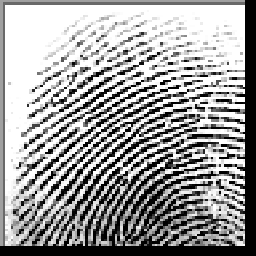

The predicted blood type is: A+


In [15]:
# Load and preprocess the image
img_path = 'uploaded_image.png'
img = image.load_img(img_path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict using the model
model = load_model('model_blood_group_detection.keras')
result = model.predict(x)

# Get the predicted label
predicted_label = np.argmax(result, axis=1)
labels = {
    0: 'A+', 
    1: 'A-', 
    2: 'AB+', 
    3: 'AB-', 
    4: 'B+', 
    5: 'B-', 
    6: 'O+', 
    7: 'O-'
}
predicted_class = labels[predicted_label[0]]

# Display the result
display(img)
print(f"The predicted blood type is: {predicted_class}")


In [16]:
import io
from ipywidgets import FileUpload
from IPython.display import display
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model

# Create the upload widget
upload = FileUpload(accept='image/*', multiple=False)
display(upload)

# Function to handle the uploaded file, preprocess it, and save it
def handle_upload(change):
    for file_tuple in upload.value:
        file_content = file_tuple['content']
        
        # Convert byte content to image
        img = Image.open(io.BytesIO(file_content))
        img.save('uploaded_image.png')

# Attach event listener
upload.observe(handle_upload, names='value')



FileUpload(value=(), accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Raw prediction result: [[9.4151938e-01 6.4167223e-05 7.5263551e-06 9.7658904e-06 1.9230862e-07
  1.8334975e-04 5.8176678e-02 3.8884333e-05]]
Predicted label index: 0
The predicted blood type is: A+


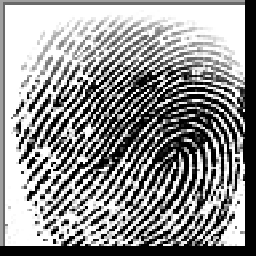

In [253]:
# Load and preprocess the image
img_path = 'uploaded_image.png'
img = image.load_img(img_path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict using the model
model = load_model('model_blood_group_detection.keras')
result = model.predict(x)

# Get the predicted label
predicted_label = np.argmax(result, axis=1)
labels = {
    0: 'A+', 
    1: 'A-', 
    2: 'AB+', 
    3: 'AB-', 
    4: 'B+', 
    5: 'B-', 
    6: 'O+', 
    7: 'O-'
}
predicted_class = labels[predicted_label[0]]

# Print the result for debugging use smote 
print("Raw prediction result:", result)
print("Predicted label index:", predicted_label[0])
print(f"The predicted blood type is: {predicted_class}")
display(img)


In [186]:
# Define the path to your dataset folder
dataset_path = 'C:\\Users\\shaik\\OneDrive\\Desktop\\Blood_group_detection\\dataset_blood_group'


In [187]:
# List subfolders and display them as labels
subfolders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

print("Labels (subfolder names) in the dataset:")
for label in subfolders:
    print(label)


Labels (subfolder names) in the dataset:
A+
A-
AB+
AB-
B+
B-
O+
O-


In [110]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model

# Load your saved model
model = load_model('model_blood_group_detection.keras')

# Function to preprocess the uploaded image and make a prediction
def predict_uploaded_image(img_path):
    print(f"Image path: {img_path}")
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image to the target size
    img_array = image.img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the input shape expected by the model
    img_array = preprocess_input(img_array)  # Preprocess the image (needed for models like ResNet50)

    # Make a prediction
    result = model.predict(img_array)
    predicted_label = np.argmax(result, axis=1)  # Get the index of the highest probability class

    # Map index to class label
    labels = {
        0: 'A+', 
        1: 'A-', 
        2: 'B+', 
        3: 'B-', 
        4: 'AB+', 
        5: 'AB-', 
        6: 'O+', 
        7: 'O-'
    }
    predicted_class = labels[predicted_label[0]]

    # Print the predicted label
    print(f"The predicted blood type is: {predicted_class}")
    return predicted_class
# Function to save the uploaded image and make a prediction
def handle_upload(change):
    clear_output()  # Clear previous outputs
    for name, file_info in upload.value.items():
        # Save the uploaded image to disk
        img_path = name
        with open(img_path, 'wb') as f:
            f.write(file_info['content'])
        print(f"Uploaded file: {img_path}")  # Confirm file saving
        
        # Predict the blood group
        predicted_class = predict_uploaded_image(img_path)
        print(f"Predicted Blood Type: {predicted_class}")

# Observe the file upload and trigger the handle_upload function
upload.observe(handle_upload, names='value')